<a href="https://colab.research.google.com/github/nicogblanc/Curso-Coderhouse-data-sience-m-dulo-I/blob/main/Proyecto_Final_Nicolas_Gonzalez_Blanc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Resumen

El siguiente notebook se hizo a partir de un conjunto de datos está relacionado con las variantes de vino tinto del vino portugués 'Vinho Verde'. El conjunto de datos describe la cantidad de varios productos químicos presentes en el vino y su efecto en su calidad.








###Objetivo
El objetivo de este notebook es realizar un análisis y exploración de los datos preexistentes, a partir de las principales medidas estadisticas y gráficos, con el fin de responder algunas hipotesis planteadas.

También con este notebook se persigue construir dos modelos de clasificación, uno de regresión logistica y otro de KNN, utilizando la libreria sklearn.

Finalmente se expresarán las conclusiones con los datos obtenidos comparando ambos modelos.

In [1]:
# importar librerias

#manipulación de datos
import pandas as pd
import numpy as np
#graficos
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
#modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

# Configurar Pandas para mostrar todas las filas
pd.set_option('display.max_rows', None)

# Configurar Pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [2]:
#Cargamos los datos

from google.colab import drive

# Montar el sistema de archivos de Google Drive

# Ruta al archivo CSV
file_path = '/content/drive/MyDrive/Curso Data Science Coderhouse/Modulo 1/Proyecto Final/WineQT.csv'

# Leer el archivo CSV en un DataFrame de pandas
df = pd.read_csv(file_path)

df.head()

#url='https://raw.githubusercontent.com/nicogblanc/Curso-Data-Sience-Coderhouse/main/heart_attack_prediction_dataset.csv?token=GHSAT0AAAAAACWEASW3BVO426NILF6BQLVQZWD4LGQ'
#df= pd.read_csv(url,sep=',', header=None)
#df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
pd.reset_option('display.max_rows')

In [4]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


#Variables


  **1 - fixed acidity**

  **2 - volatile acidity**

  **3 - citric acid**

  **4 - residual sugar**

  **5 - chlorides**

  **6 - free sulfur dioxide**

  **7 - total sulfur dioxide**

  **8 - density**

  **9 - pH**

  **10 - sulphates**

  **11 - alcohol**
   
  **12 - quality (score entre 0 and 10)**




In [5]:
df.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [7]:
df.shape

(1143, 13)

In [8]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [10]:
# Calcular media, mediana y moda
media = df.mean()      # Calcula la media de cada columna
mediana = df.median()  # Calcula la mediana de cada columna
moda = df.mode().iloc[0]  # Toma solo la primera moda si hay más de una

# Combinar en un nuevo DataFrame con las filas "Media", "Mediana" y "Moda"
result = pd.DataFrame([media, mediana, moda], index=['Media', 'Mediana', 'Moda'])

# Mostrar el resultado
print(result)

         fixed acidity  volatile acidity  citric acid  residual sugar  \
Media         8.311111          0.531339     0.268364        2.532152   
Mediana       7.900000          0.520000     0.250000        2.200000   
Moda          7.200000          0.500000     0.000000        2.000000   

         chlorides  free sulfur dioxide  total sulfur dioxide  density  \
Media     0.086933            15.615486             45.914698  0.99673   
Mediana   0.079000            13.000000             37.000000  0.99668   
Moda      0.080000             6.000000             28.000000  0.99760   

               pH  sulphates    alcohol   quality          Id  
Media    3.311015   0.657708  10.442111  5.657043  804.969379  
Mediana  3.310000   0.620000  10.200000  6.000000  794.000000  
Moda     3.300000   0.600000   9.500000  5.000000    0.000000  


In [11]:
cardinalidad = pd.DataFrame({'Cantidad' : df.nunique(), 'Porcentaje' : (df.nunique()) / (df.shape[0]) * (100)})
cardinalidad # si el % es bajo la cardinalidad es baja es decir, que la cantidad de registrps únicos es baja.

,Cantidad,Porcentaje
fixed acidity,91,7.961505
volatile acidity,135,11.811024
citric acid,77,6.736658
residual sugar,80,6.999125
chlorides,131,11.461067
free sulfur dioxide,53,4.636920
total sulfur dioxide,138,12.073491
density,388,33.945757
pH,87,7.611549
sulphates,89,7.786527


In [12]:
#El dato de Id no aporta al análisis y no es determinante de mi variable target (quality)
df.drop(columns="Id",inplace=True)



In [14]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


#Preguntas
Las preguntas de interés para este dataset son las siguientes:
* Existe una relacion directa entre el alcohol y la calidad de vino, es decir, a mayor contenido de alcohol, el vino obtiene mayor puntualción en términos de calidad?
* El azucar podría tener una relación directamente proporcional con la calidad del vino? A mayor contenido de azucar residual, la puntuación es mas elevada?
* Es acido cítrico un factor determinante para que un vino obtenga una mayor calidad?

##Hipotesis de correlación (en base a supuestos sobre las variables presentes en el dataset)

###1)
La hipotesis planteada para este interrogante es que debería existir una relación directamente proporcional entre el aumento de alcohol con el aumento de calidad del vino.

###2)
La hipotesis planteada sobre el segundo interrogante considera que un vino de mayor calidad debería tener una menor proporcion de azucar residual que un vino de baja calidad.

###3)
 La hipotesis planteada para este interrogante es que si, el acido cítrico es un elemento fundamental en el equilibrio gustativo del vino y por ende en lograr que el mismo obtenga una mayor calidad.

##Hipotesis de clasificación (en base a supuestos sobre las variables presentes en el dataset):
Los dos modelos de aprendizaje automático utilizados en este notebook serán capaz de clasificar con precisión las instancias en diferentes categorías (1 0) basadas en los 11 atributos pertenecientes al dataset inicial.
Se estima que con los modelos implementados, las métricas principales para medir la performance del modelo (recall y precision) superen el 80%.


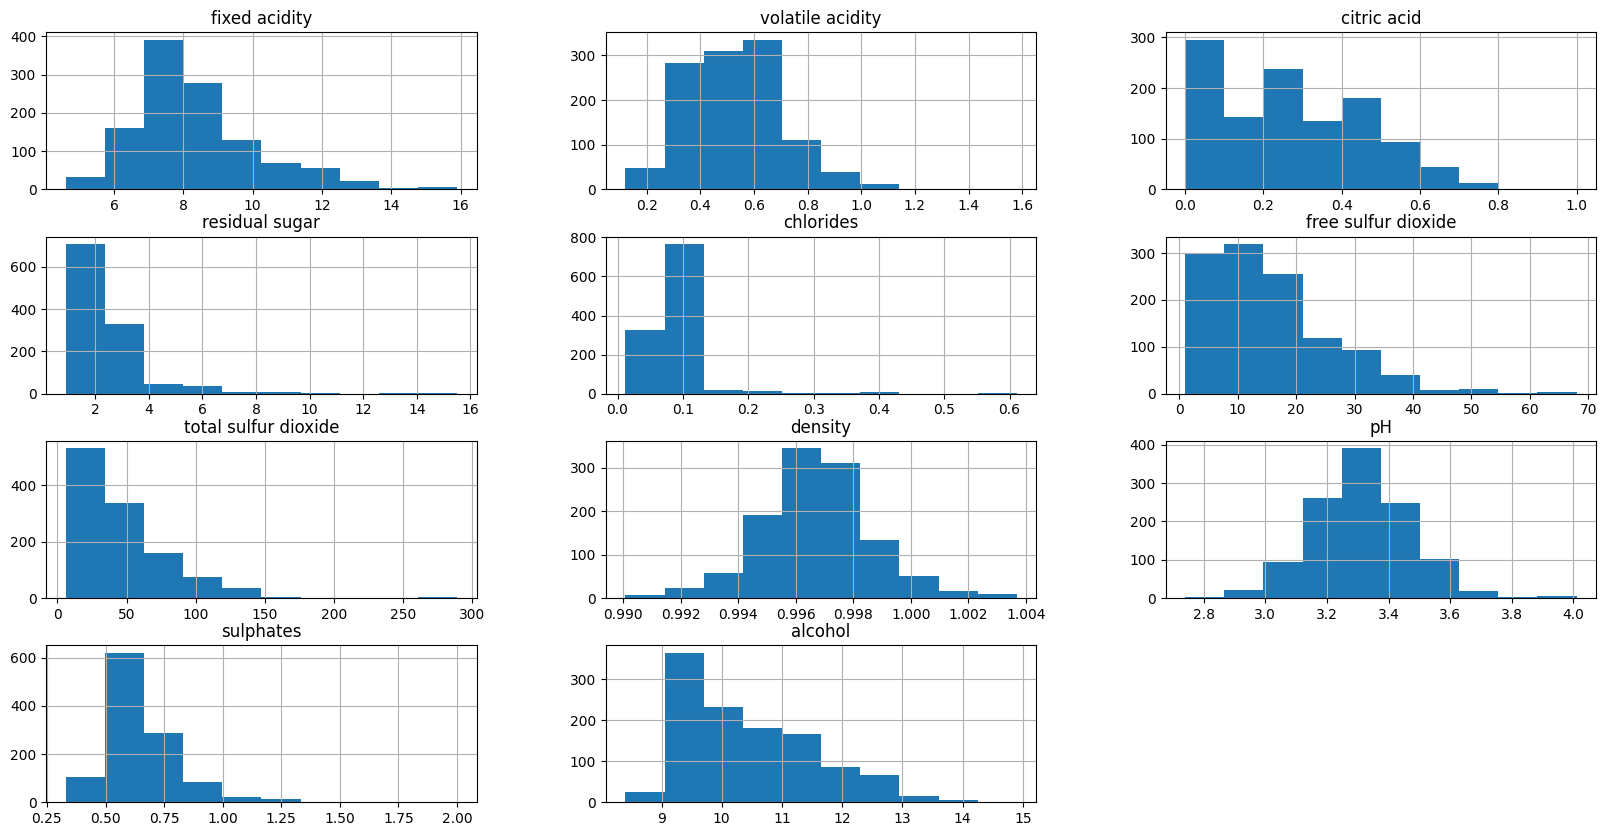

In [13]:
df.drop('quality', axis=1).hist(figsize=(20,10));


Se puede validar que todas las variables, a exepción de "density" y "ph" que siguen una distribución bastante normal, presentan una asimetría. Es decir, una tendencia de que los valores sean más frecuentes alrededor de los extremos inferiores del eje x.

En este caso, la distribución está sesgada positivamente lo que significa que la cola del lado derecho del histograma es más larga que la del lado izquierdo.

Por ende, la mayoría de los valores tienden a agruparse hacia el lado izquierdo del eje x (es decir, los valores más pequeños) y cada vez hay menos valores en el lado derecho del eje x (es decir, los valores más grandes).



Para realizar la detección de outliers, voy a realizar un gráfico boxplot de las variables "residual sugar" y "chlorides" ya que son las features que presentan valores con poca frecuencia en los extremos superiores derechos del eje x.

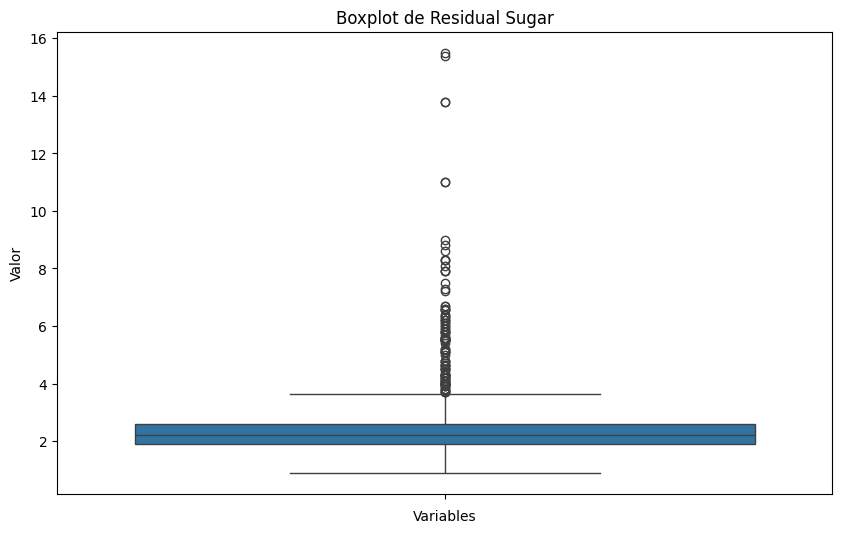

In [14]:
plt.figure(figsize=(10, 6))

# Crear un gráfico de boxplot para 'residual sugar' y 'chlorides'
sns.boxplot(data=df['residual sugar'])

# Título y etiquetas
plt.title('Boxplot de Residual Sugar')
plt.ylabel('Valor')
plt.xlabel('Variables')

# Mostrar el gráfico
plt.show()

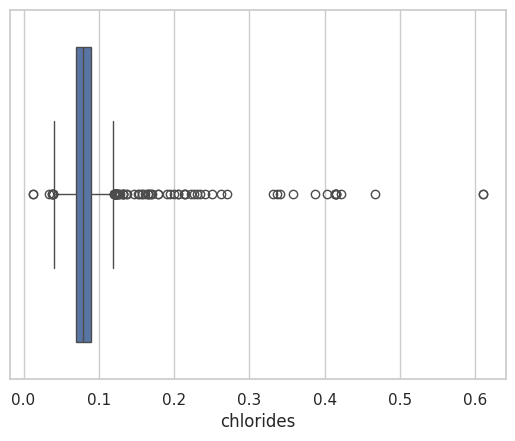

In [15]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["chlorides"])

# Mostrar el gráfico
plt.show()

In [16]:
#Me interesa validar cuales son los valores dentro de mi variable target "quality"
print("The Value Quality ",df["quality"].unique())


The Value Quality  [5 6 7 4 8 3]


La mayor frecuencia de valores se concentra en la calificación 5 y 6, seguida de la 7.

<Axes: ylabel='Frequency'>

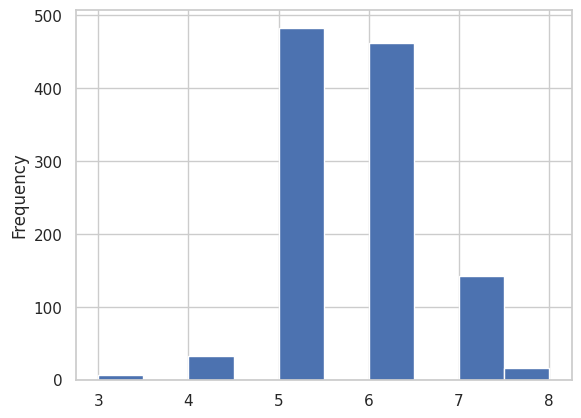

In [17]:
df['quality'].plot.hist(bins=10)

In [18]:
#genero un tag que me va a diferenciar si la calidad del vino es bajo o alta

df['quality_label'] = df['quality'].apply(lambda x: 'alta' if x >5 else 'baja')

# Agrupar y contar los valores de 'quality_label' en el DataFrame filtrado

quality_counts=df['quality_label'].value_counts()

quality_counts

,count
quality_label,
alta,621
baja,522


Se puede determinar que hay una mayor presencia de calificaciones dentro del grupo alta.

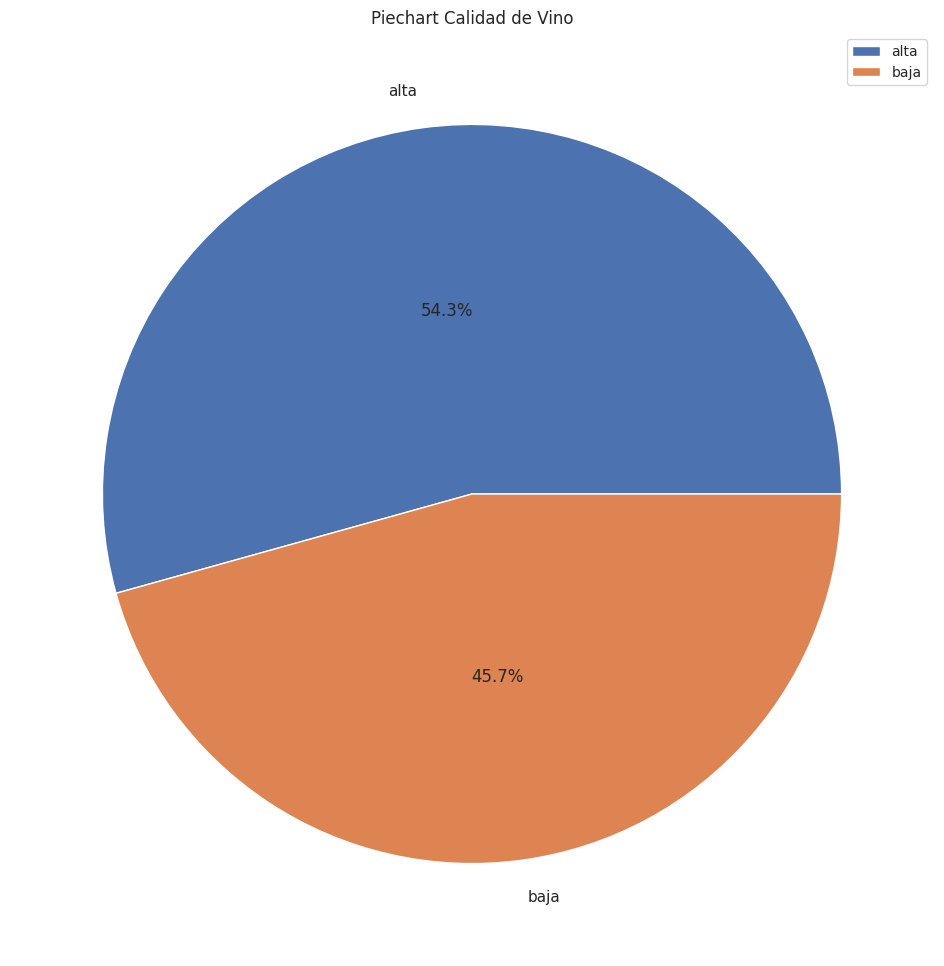

In [19]:


# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 12))

# Crear el gráfico de pastel
ax.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%', pctdistance=0.5)

# Agregar la leyenda y el título
plt.legend(loc="upper right", labels=quality_counts.index, fontsize=10)
ax.set_title('Piechart Calidad de Vino')

# Mostrar el gráfico
plt.show()




Luego de haber hecho un primer análisis de la distribución de las features que hacen a la calidad del vino, asi como también de la variable quality, junto con su transformación a una variable target con resultado binario, llego el momento de analizar el impacto que tienen las variables en si sobre la calidad del vino, destacando cuales son las features que impactan mas directamente en la calidad percibida de esta bebida.

Para ello, mi intención es agrupar la media de las features sobre los diferentes valores que puede llegar a tomar la columna de calidad, con el fin de detectar aumentos consistentes de un elemento a medida que la calidad de vino es mayor.

In [20]:
# Excluir la columna 'quality_label' antes de calcular la media
ave_quality = df.drop(columns='quality_label').groupby("quality").mean()

ave_quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.450000,0.897500,0.211667,2.666667,0.105333,8.166667,24.500000,0.997682,3.361667,0.550000,9.691667
4,7.809091,0.700000,0.165758,2.566667,0.094788,14.848485,40.606061,0.996669,3.391212,0.637879,10.260606
5,8.161077,0.585280,0.240124,2.540476,0.091770,16.612836,55.299172,0.997073,3.302091,0.613375,9.902277
6,8.317749,0.504957,0.263680,2.444805,0.085281,15.215368,39.941558,0.996610,3.323788,0.676537,10.655339
7,8.851049,0.393671,0.386573,2.760140,0.075217,14.538462,37.489510,0.996071,3.287133,0.743566,11.482634
8,8.806250,0.410000,0.432500,2.643750,0.070187,11.062500,29.375000,0.995553,3.240625,0.766250,11.937500


<Axes: xlabel='quality'>

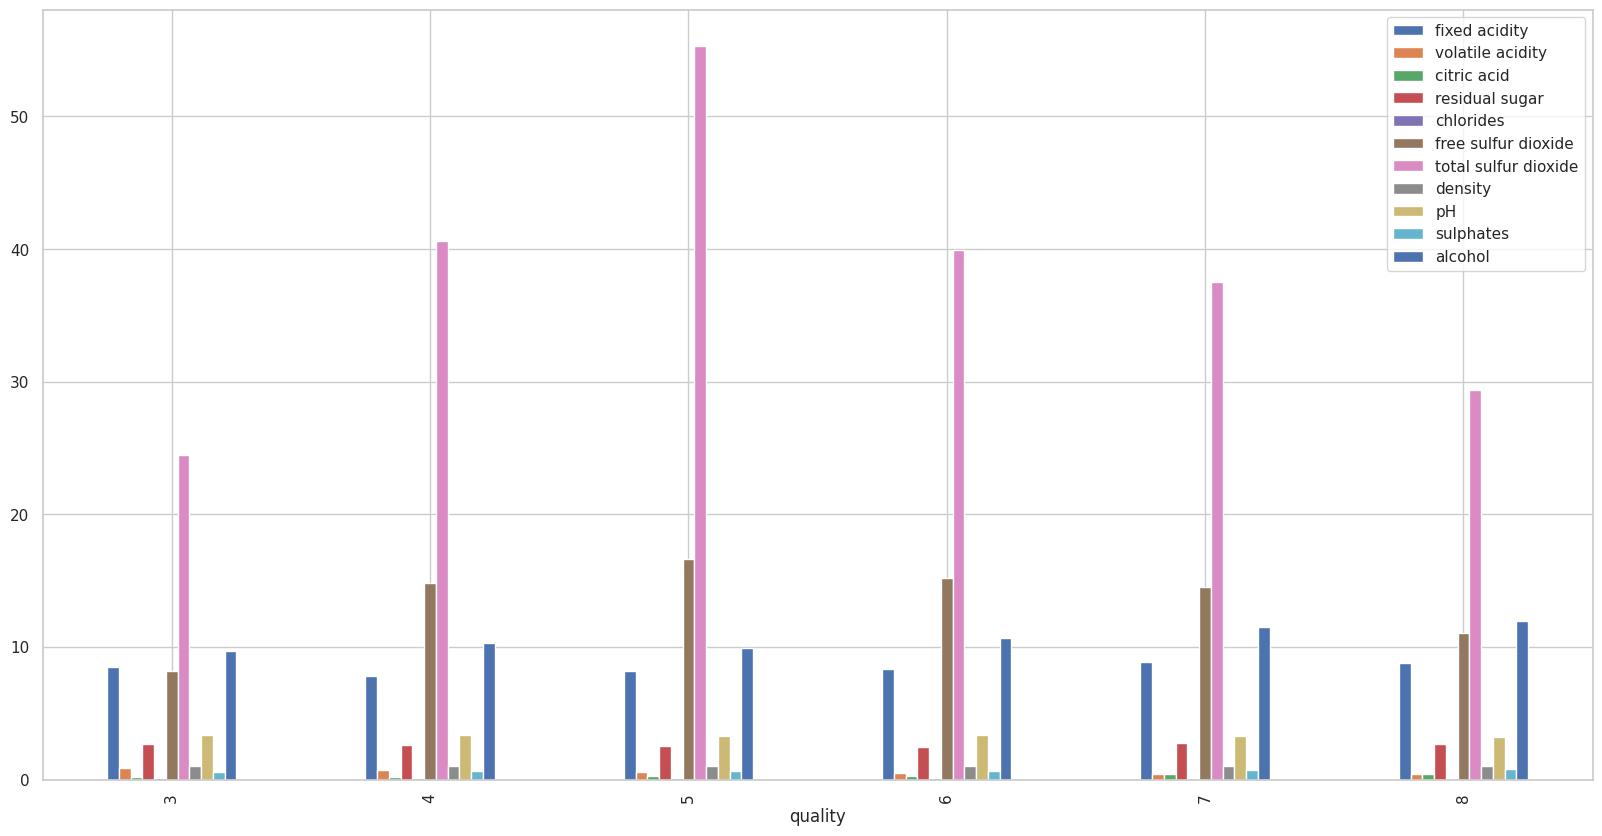

In [21]:
ave_quality.plot(kind="bar",figsize=(20,10))


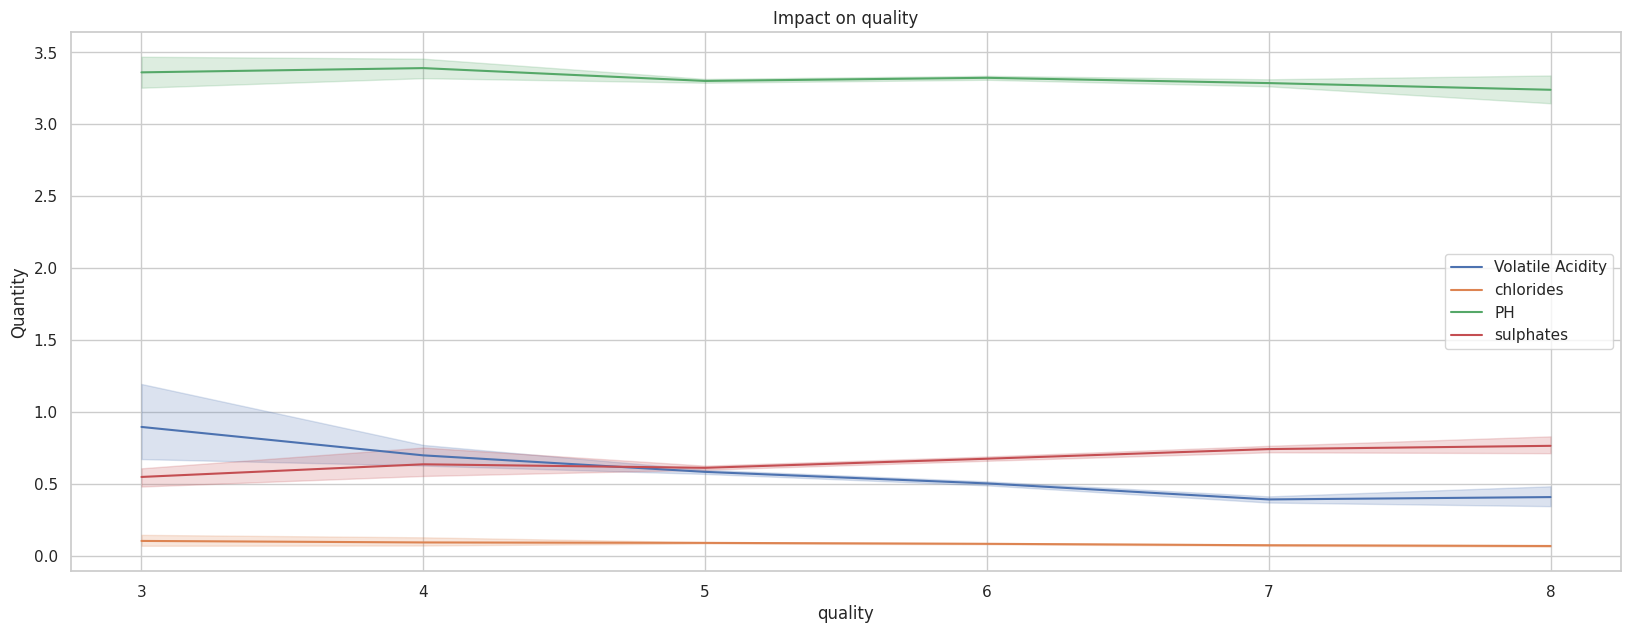

In [22]:
# let see effect some of elements on the quality - details
plt.figure(figsize=(20,7))
sns.lineplot(data=df, x="quality",y="volatile acidity",label="Volatile Acidity")
sns.lineplot(data=df, x="quality",y="chlorides",label="chlorides")
sns.lineplot(data=df, x="quality",y="pH",label="PH")
sns.lineplot(data=df, x="quality",y="sulphates",label="sulphates")

plt.ylabel("Quantity")
plt.title("Impact on quality")
plt.legend()
plt.show()

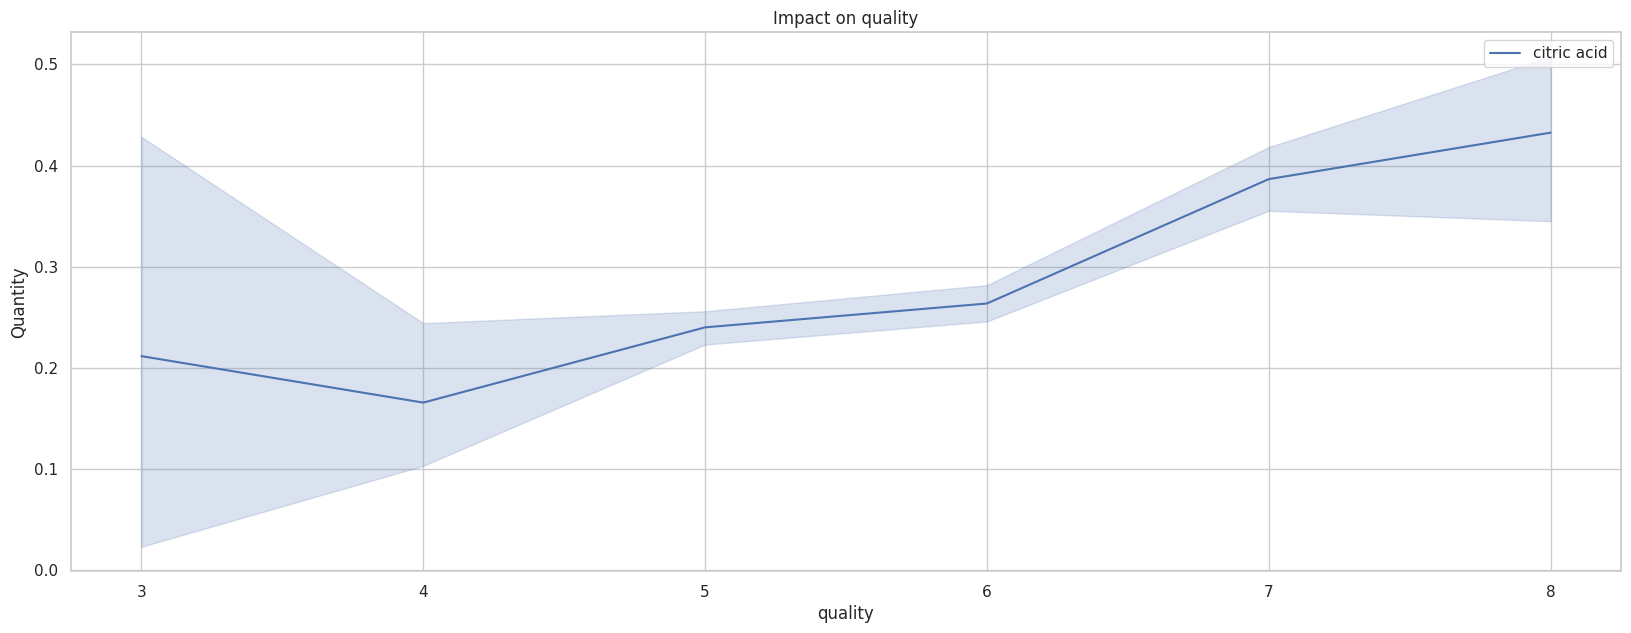

In [23]:
plt.figure(figsize=(20,7))
sns.lineplot(data=df, x="quality",y="citric acid",label="citric acid")
plt.ylabel("Quantity")
plt.title("Impact on quality")
plt.legend()
plt.show()

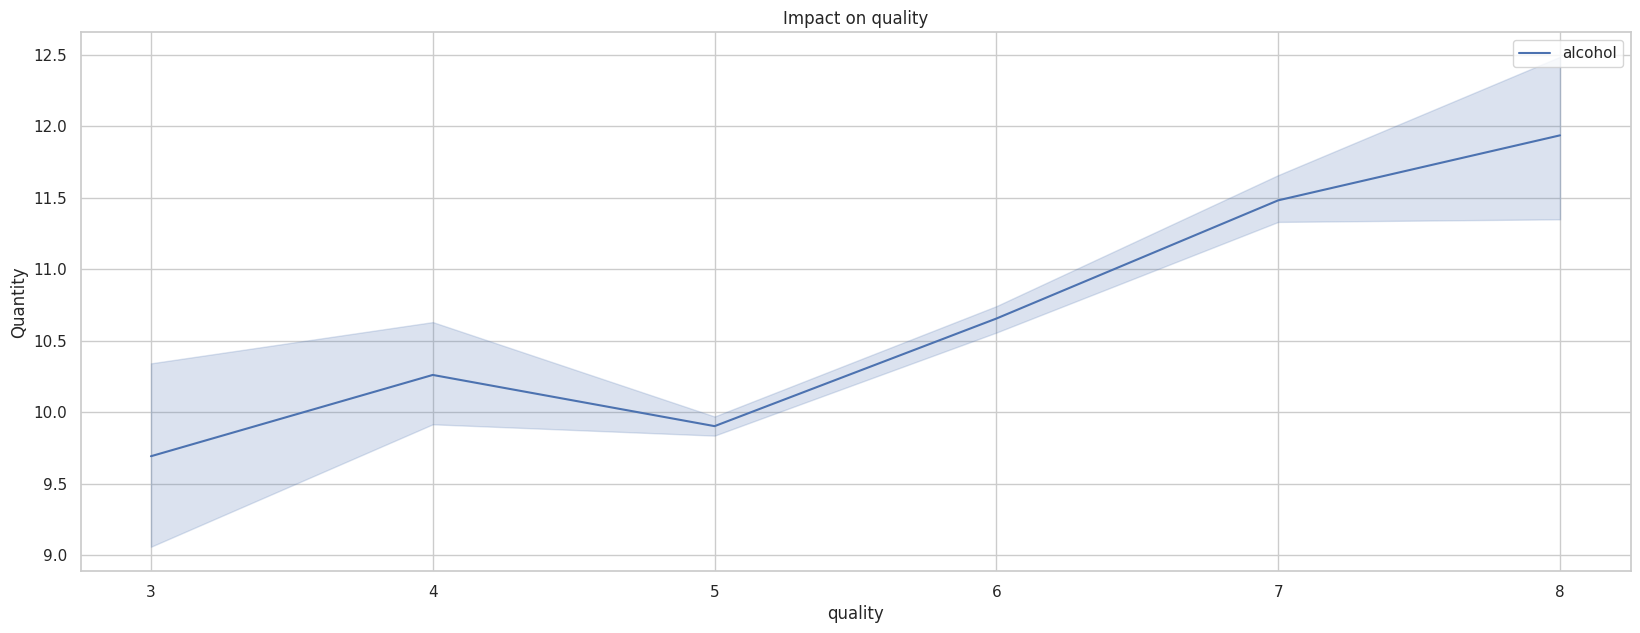

In [24]:
# let see effect some of elements on the quality - details
plt.figure(figsize=(20,7))
sns.lineplot(data=df, x="quality",y="alcohol",label="alcohol")
plt.ylabel("Quantity")
plt.title("Impact on quality")
plt.legend()
plt.show()

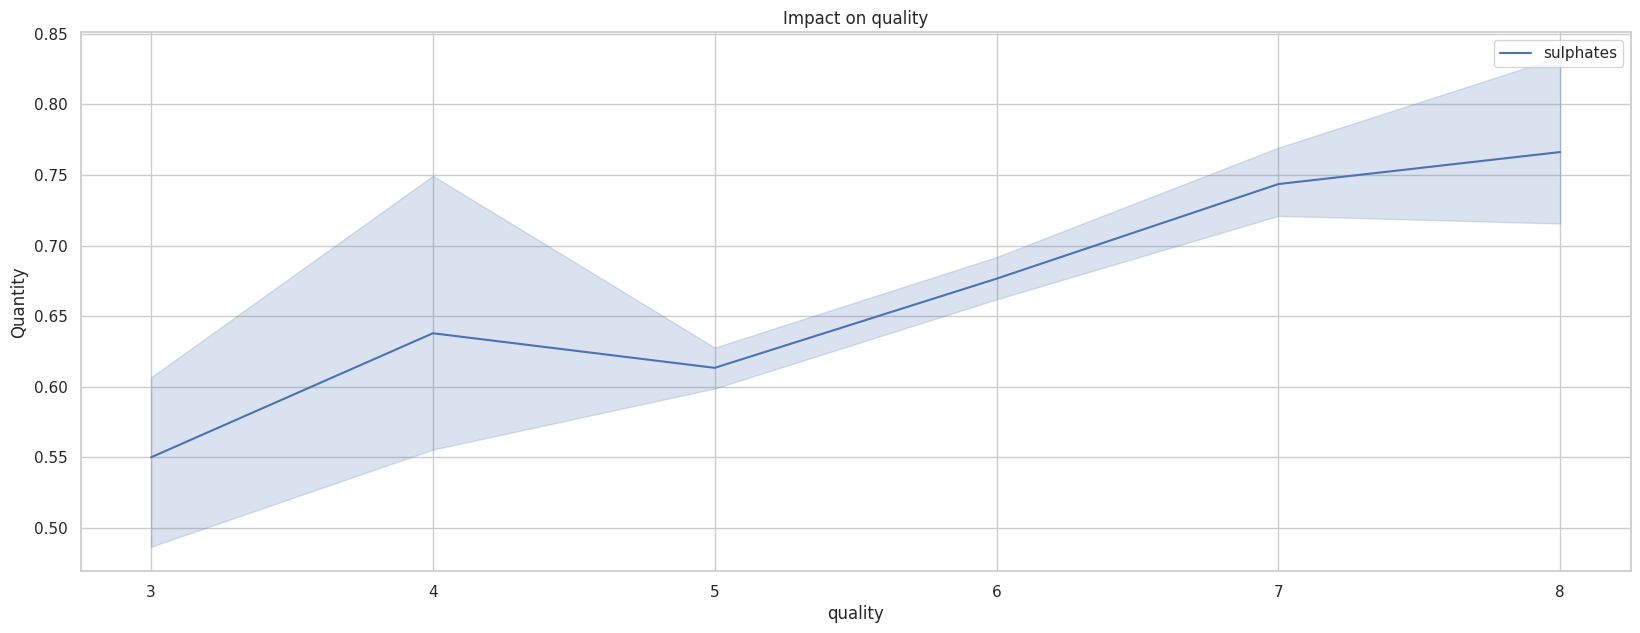

In [25]:
plt.figure(figsize=(20,7))
sns.lineplot(data=df, x="quality",y="sulphates",label="sulphates")
plt.ylabel("Quantity")
plt.title("Impact on quality")
plt.legend()
plt.show()

El siguiente gráfico permite visibilizar la relación de los valores de alcohol y sulphats cuando la calidad de vino es baja y alta. Demostrando que a mayor calidad, ambos valores tienden a ser mas elevados, a excepciones de los outliers representados por los puntos alejados de las grandes concentraciones de datos.

Esto condice con lo observado en los gráficos individuales de cada una de las variables, donde a partir del valor 5 hacia arriba de quality, se da una aumento increcendo del alcohol y sulphates.

<Axes: xlabel='alcohol', ylabel='sulphates'>

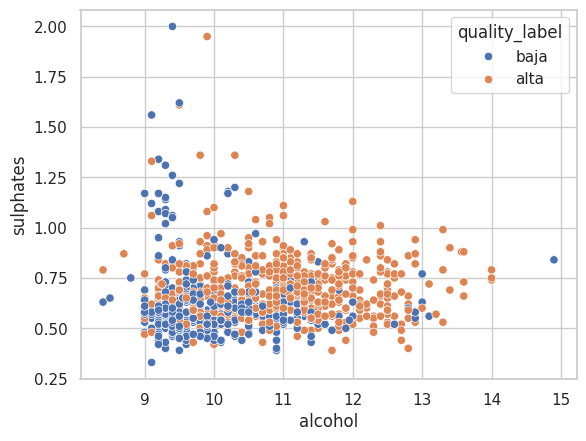

In [26]:
sns.scatterplot(data=df, x="alcohol", y="sulphates", hue="quality_label")

Análisis de Correlación

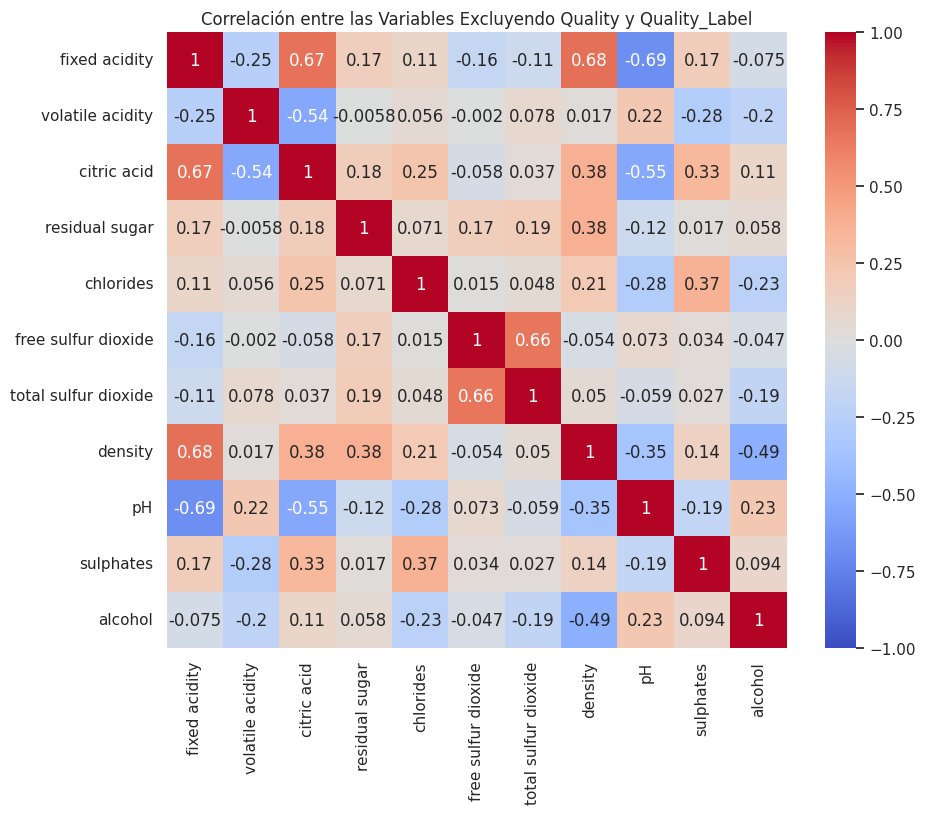

In [27]:
# Calcular la matriz de correlación
# Excluir las columnas 'quality' y 'quality_label' antes de calcular la correlación
corr_matrix = df.drop(['quality', 'quality_label'], axis=1).corr()


# Crear un heatmap con las demás variables
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlación entre las Variables Excluyendo Quality y Quality_Label')
plt.show()



Para comenzar con la realización de los modelos, primero voy a reemplazar los valores de la columna quality por la quality_label, de esta manera la columna quality me va a quedar como un dato del tipo object binario, permitiendo determinar si la calidad del vino es es alta o baja, reemplazando los valores comprendidos entre 3 y 8.

Para mayor practicidad, el nombre con el que se va a representar y que luego va a tomar lugar como mi variable target (Y) va a ser "quality"

In [28]:
df.drop(columns="quality",inplace=True)
# Reemplazar el nombre de la columna 'quality_label' por 'quality'
df = df.rename(columns={'quality_label': 'quality'})


In [29]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,baja
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,baja
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,baja
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,alta
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,baja


In [30]:
X = df.drop(columns="quality")


In [31]:
y = pd.get_dummies(df['quality'])
y

,alta,baja
0,False,True
1,False,True
2,False,True
3,True,False
4,False,True
...,...,...
1138,True,False
1139,True,False
1140,False,True
1141,True,False


In [32]:
y.drop("baja", axis=1, inplace=True)
y.rename(columns={'alta':"target"}, inplace=True)
y

,target
0,False
1,False
2,False
3,True
4,False
...,...
1138,True
1139,True
1140,False
1141,True


In [33]:
y = y['target'].values.astype(int)
y

array([0, 0, 0, ..., 0, 1, 0])

###Modelo Logistic Regression

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=0)
# Crear la instancia del modelo
clf = LogisticRegression()

# Paso 3
# Entrenar el modelo con los datos y la etiqueta
clf.fit(X, y) #Se ajusta el modelo a los datos disponibles: x = variable feaature (que se identificó como relevante para diferenciar la calidad de un vino respecto del otro) y = variable objetivo (si es calidad de vino alta 1 si es calidad baja 0)

LogisticRegression()

In [35]:
# Obtenemos las predicciones del modelo con X_test
preds = clf.predict(X_test)
preds_train = clf.predict(X_train)

In [36]:
# Convertir el array numpy a un objeto de pandas Series
y_series = pd.Series(y)

y_c = y_series.value_counts()

y_c

,count
1,621
0,522


In [37]:
y_series.value_counts(normalize=True).round(2)*100

,proportion
1,54.0
0,46.0


In [38]:
# Creando la matriz de confusión
cm = confusion_matrix(y_test, preds)
cm

array([[120,  42],
       [ 34, 147]])

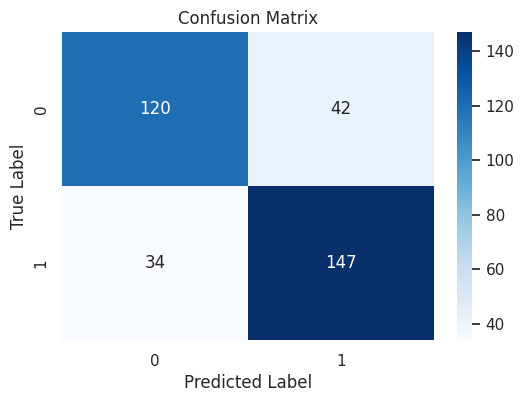

In [39]:
# usando heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
#Clase 1: alta
#Clase 0: baja

In [40]:
accuracy = metrics.accuracy_score(y_test, preds)
accuracy


0.7784256559766763

In [41]:
# Precision se evalua para cada categoria
precision_positiva = metrics.precision_score(y_test, preds, pos_label=1)
precision_negativa = metrics.precision_score(y_test, preds, pos_label=0)
precision_positiva, precision_negativa

(0.7777777777777778, 0.7792207792207793)

In [42]:
metrics.recall_score(y_test, preds, pos_label=1), metrics.recall_score(y_test, preds, pos_label=0)


#El recall proporciona información sobre la capacidad del modelo para detectar correctamente los casos positivos en una clase específica

(0.8121546961325967, 0.7407407407407407)

In [43]:
#probemos en train

preds_train = clf.predict(X_train)
f1_positivo = metrics.f1_score(y_train, preds_train, pos_label=1)
f1_negativo = metrics.f1_score(y_train, preds_train, pos_label=0)
f1_positivo, f1_negativo

(0.7634285714285713, 0.7144827586206897)

In [44]:
f1_positivo = metrics.f1_score(y_test, preds, pos_label=1)
f1_negativo = metrics.f1_score(y_test, preds, pos_label=0)
f1_positivo, f1_negativo


(0.7945945945945946, 0.7594936708860759)

In [45]:
# Todas las metricas de entrenamiento en un solo resumen
print(metrics.classification_report(y_train, preds_train))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71       360
           1       0.77      0.76      0.76       440

    accuracy                           0.74       800
   macro avg       0.74      0.74      0.74       800
weighted avg       0.74      0.74      0.74       800



In [46]:
# Todas las metricas en un solo resumen
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       162
           1       0.78      0.81      0.79       181

    accuracy                           0.78       343
   macro avg       0.78      0.78      0.78       343
weighted avg       0.78      0.78      0.78       343



###Modelo de KNeighborsClassifier (KNN)




In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=0)
# Crear la instancia del modelo
clf_k = KNeighborsClassifier(n_neighbors=3)

# Entrenar el modelo con los datos y la etiqueta
clf_k.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [50]:
# Obtenemos las predicciones del modelo con X_test
preds_k = clf.predict(X_test)
preds_train_k = clf.predict(X_train)

In [51]:
y_series_k = pd.Series(y)

y_k_c = y_series.value_counts()

y_k_c

,count
1,621
0,522


In [52]:
y_series_k.value_counts(normalize=True).round(2)*100

,proportion
1,54.0
0,46.0


In [53]:
# Creando la matriz de confusión
cm_k = confusion_matrix(y_test, preds)
cm_k

array([[120,  42],
       [ 34, 147]])

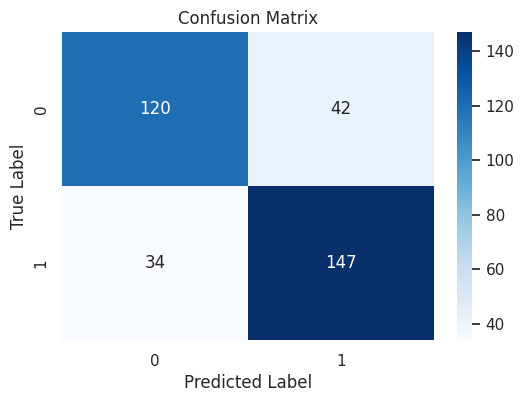

In [54]:
# usando heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_k, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
#Clase 1: alta
#Clase 0: baja

In [55]:
accuracy = metrics.accuracy_score(y_test, preds_k)
accuracy

0.8192419825072886

In [56]:
# Precision se evalua para cada categoria
precision_positiva = metrics.precision_score(y_test, preds_k, pos_label=1)
precision_negativa = metrics.precision_score(y_test, preds_k, pos_label=0)
precision_positiva, precision_negativa

(0.8181818181818182, 0.8205128205128205)

In [57]:
metrics.recall_score(y_test, preds_k, pos_label=1), metrics.recall_score(y_test, preds_k, pos_label=0)


(0.8453038674033149, 0.7901234567901234)

In [58]:
preds_train_k = clf_k.predict(X_train)
f1_positivo_k = metrics.f1_score(y_train, preds_train_k, pos_label=1)
f1_negativo_k = metrics.f1_score(y_train, preds_train_k, pos_label=0)
f1_positivo, f1_negativo

(0.7945945945945946, 0.7594936708860759)

In [59]:
f1_positivo = metrics.f1_score(y_test, preds_k, pos_label=1)
f1_negativo = metrics.f1_score(y_test, preds_k, pos_label=0)
f1_positivo, f1_negativo


(0.8315217391304347, 0.8050314465408805)

In [60]:
# Todas las metricas de entrenamiento en un solo resumen
print(metrics.classification_report(y_train, preds_train_k))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       360
           1       0.86      0.82      0.84       440

    accuracy                           0.83       800
   macro avg       0.82      0.83      0.83       800
weighted avg       0.83      0.83      0.83       800



In [62]:
# Todas las metricas de testeo en un solo resumen
print(metrics.classification_report(y_test, preds_k))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81       162
           1       0.82      0.85      0.83       181

    accuracy                           0.82       343
   macro avg       0.82      0.82      0.82       343
weighted avg       0.82      0.82      0.82       343



Armado de PCA, para quedarme con dos conjuntos de variables (componentes) y así poder realizar el gráfico de fronteras de decisión.

In [63]:
# tomemos unicamente las variables númericas
df_2 = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                          'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
df_2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [64]:
# Creamos la instancia del modelo
modelo_pca = PCA(n_components=4)

# Entrenamos el modelo con nuestros datos
modelo_pca.fit(df_2)

PCA(n_components=4)

In [65]:
modelo_pca.components_

array([[-6.08544192e-03,  3.98133687e-04,  1.83686916e-04,
         7.82198316e-03,  6.63586262e-05,  2.13181981e-01,
         9.76944229e-01,  2.55106171e-06, -2.41270896e-04,
         1.41733197e-04, -5.90971157e-03],
       [-2.85806586e-02, -1.75673875e-03, -3.00133924e-03,
         7.75715056e-03, -1.60775512e-04,  9.76407137e-01,
        -2.13202816e-01, -3.16626931e-05,  3.26171077e-03,
         4.50513390e-04,  1.65430532e-02],
       [ 9.41700205e-01, -2.41529004e-02,  7.33705582e-02,
         3.16617010e-01,  3.39612993e-03,  2.57147217e-02,
        -2.61013912e-03,  7.91423981e-04, -5.85744618e-02,
         1.65084538e-02, -5.10301365e-02],
       [-2.86116122e-01,  5.27101806e-03, -9.55059048e-03,
         9.08831598e-01, -1.45041907e-03, -2.13662157e-02,
        -2.56578787e-03, -3.28459592e-05,  2.51447877e-02,
        -4.84891762e-03,  3.01533941e-01]])

In [66]:
modelo_pca.explained_variance_ratio_[0]

0.9471814929670951

In [67]:
# Empecemos por los componentes
# para esto usamos .components_
# vamos a guardar esta información en un dataframe, para poderlo ver más facilmente
lista_componentes = ['PC1', 'PC2', 'PC3', 'PC4']
componentes = pd.DataFrame(data=modelo_pca.components_, columns = df_2.columns, index=lista_componentes)
componentes

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
PC1,-0.006085,0.000398,0.000184,0.007822,0.000066,0.213182,0.976944,0.000003,-0.000241,0.000142,-0.005910
PC2,-0.028581,-0.001757,-0.003001,0.007757,-0.000161,0.976407,-0.213203,-0.000032,0.003262,0.000451,0.016543
PC3,0.941700,-0.024153,0.073371,0.316617,0.003396,0.025715,-0.002610,0.000791,-0.058574,0.016508,-0.051030
PC4,-0.286116,0.005271,-0.009551,0.908832,-0.001450,-0.021366,-0.002566,-0.000033,0.025145,-0.004849,0.301534


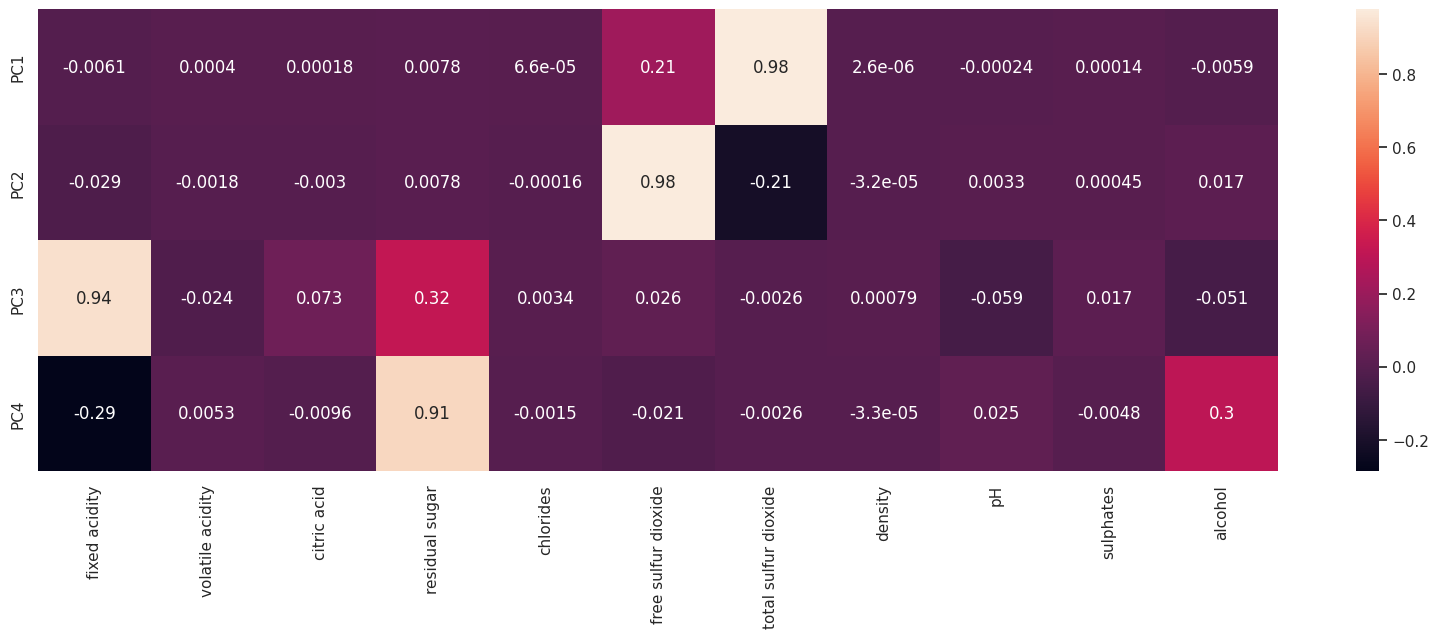

In [73]:
# practiquemos con gráficos, nos ayudan a entender mejor la información
plt.figure(figsize=(20, 6))
ax = sns.heatmap(componentes, annot=True)


In [89]:
# Veamos la varianza explicada de cada componente
# para eso utilizamos .explained_variance_ratio_
print(lista_componentes)
print(modelo_pca.explained_variance_ratio_.round(2)*100)

['PC1', 'PC2', 'PC3', 'PC4']
[95.  5.  0.  0.]


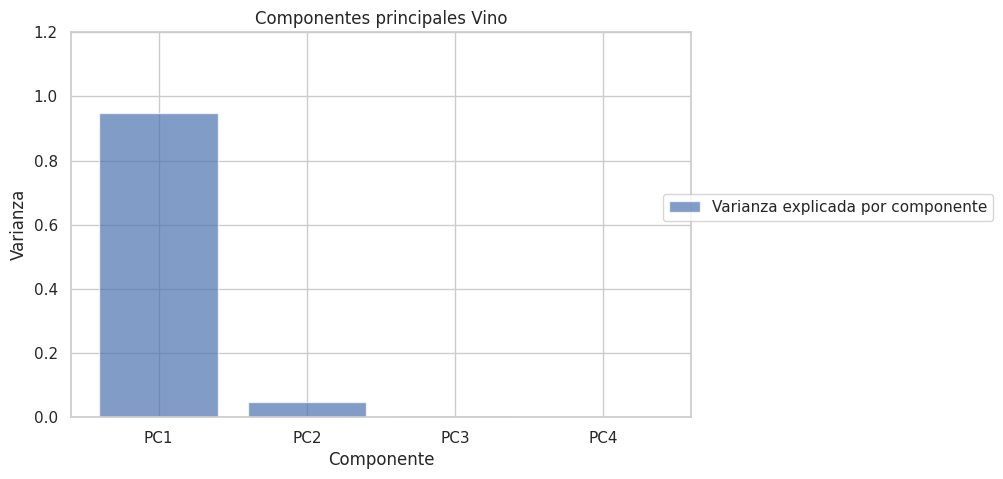

In [90]:
# Practiquemos con gráficos, nos ayudan a entender mejor la información
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(lista_componentes, modelo_pca.explained_variance_ratio_, alpha=0.7, label='Varianza explicada por componente')


ax.set_title('Componentes principales Vino')
ax.set_xlabel('Componente')
ax.set_ylabel('Varianza')
ax.set_ylim(0, 1.2)
ax.legend(bbox_to_anchor = (1.5, 0.6))

In [91]:
# cuando utilizamos .transform estamos calculando la función para cada dato y generando el resultado
# luego lo guardamos en un dataframe para poder utilizarlo más facilmente
proyecciones = pd.DataFrame(modelo_pca.transform(df_2), index=df_2.index,columns=lista_componentes)
proyecciones

,PC1,PC2,PC3,PC4
0,-12.617220,-1.961333,-1.129620,-0.489937
1,22.607329,4.672012,-0.261983,-0.238846
2,7.772828,-2.322476,-0.578380,-0.263830
3,14.036956,-1.750228,2.586913,-1.667931
4,-12.617220,-1.961333,-1.129620,-0.489937
...,...,...,...,...
1138,-2.917915,14.395525,-1.650753,0.265364
1139,-5.082249,13.803305,-1.255696,-0.666301
1140,1.630621,16.464205,-1.758049,-0.201293
1141,9.960748,21.828683,-1.849773,0.110332


In [92]:
#se simplifican las variablas a las dos primeros PC1 y PC2 ya que son los que explican la varianza en un 100%
proyecciones.drop(columns=['PC3', 'PC4'], inplace=True)

In [93]:
proyecciones

,PC1,PC2
0,-12.617220,-1.961333
1,22.607329,4.672012
2,7.772828,-2.322476
3,14.036956,-1.750228
4,-12.617220,-1.961333
...,...,...
1138,-2.917915,14.395525
1139,-5.082249,13.803305
1140,1.630621,16.464205
1141,9.960748,21.828683


In [96]:
# Agreguemos la columna de las especies para poderla utilizar más adelante
proyecciones['quality'] = df['quality'] # Esto solo funciona por que tienen el mismo index
proyecciones

,PC1,PC2,quality
0,-12.617220,-1.961333,baja
1,22.607329,4.672012,baja
2,7.772828,-2.322476,baja
3,14.036956,-1.750228,alta
4,-12.617220,-1.961333,baja
...,...,...,...
1138,-2.917915,14.395525,alta
1139,-5.082249,13.803305,alta
1140,1.630621,16.464205,baja
1141,9.960748,21.828683,alta


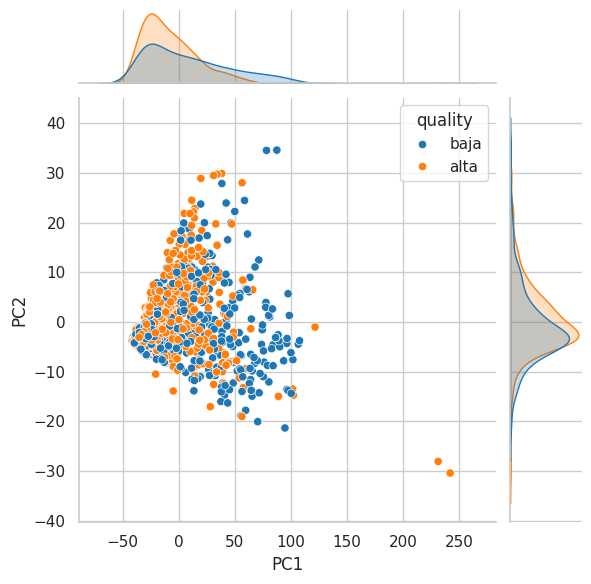

In [98]:
# Practiquemos con un gráfico de seaborn, así podremos ver la distribución y la relación entre las componentes 1 y 2
g = sns.jointplot(x='PC1', y='PC2', data=proyecciones, hue="quality", palette="tab10")
g.fig.set_figwidth(6)

#La función jointplot crea un gráfico en el que se muestra la distribución de los valores de dos variables en
#forma de histogramas, y también traza una gráfica de dispersión para mostrar la relación entre ambas variables.

In [99]:
proyecciones_features=proyecciones[["PC1", "PC2"]]
proyecciones_features

,PC1,PC2
0,-12.617220,-1.961333
1,22.607329,4.672012
2,7.772828,-2.322476
3,14.036956,-1.750228
4,-12.617220,-1.961333
...,...,...
1138,-2.917915,14.395525
1139,-5.082249,13.803305
1140,1.630621,16.464205
1141,9.960748,21.828683


In [100]:
proyecciones_target=proyecciones[["quality"]]
proyecciones_target

,quality
0,baja
1,baja
2,baja
3,alta
4,baja
...,...
1138,alta
1139,alta
1140,baja
1141,alta


In [147]:
# Paso 1
# Importar las librerias del modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=0)
# Paso 2
# Crear la instancia del modelo
clf = LogisticRegression()

# Paso 3
# Entrenar el modelo con los datos y la etiqueta
clf.fit(X, y) #Se ajusta el modelo a los datos disponibles: x = variable feaature (que se identificó como relevante para diferenciar la calidad de un vino respecto del otro) y = variable objetivo (si es calidad de vino alta 1 si es calidad baja false)

LogisticRegression()

In [148]:
mapping = {'baja': False, 'alta': True}

# Aplicar el mapeo a la columna 'valor'
proyecciones['quality'] = proyecciones['quality'].replace(mapping)

y=proyecciones['quality']

y = y.values.astype(int)
y

array([0, 0, 0, ..., 0, 1, 0])

In [149]:
x2= proyecciones_features.values #Se extraen los valores del dataframe en una matriz
y2=y


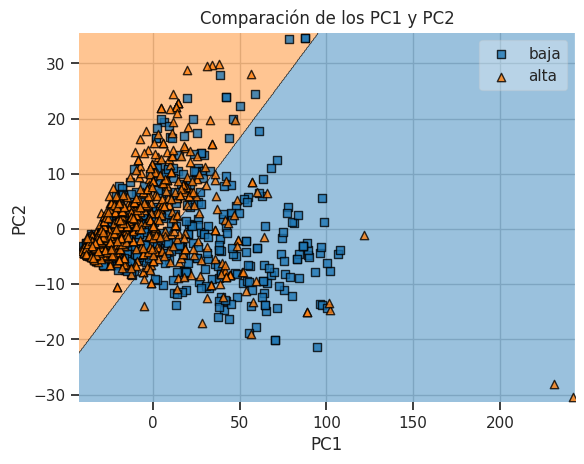

In [151]:
# revisar https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/#plot_decision_regions-visualize-the-decision-regions-of-a-classifier
ax=plot_decision_regions(x2, y2, clf=clf)# Añadir anotaciones #requiere el uso de numpy para graficar las fronteras de decisión

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Comparación de los PC1 y PC2')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,
          ['baja', 'alta'],
           framealpha=0.3, scatterpoints=1)
plt.show()

###Conclusiones

La primera conclusión, en base a los resultados obtenidos de ambos modelos, es que la performance del modelo de KNN para la muestra test fue mejor en términos de recall que el modelo de regresión logistica, siendo el recall de KNN para la muestra de testeo pos_label 0.85 en comparación con los 0.81 del modelo de regresión logistica.

Por otro lado, en términos de eficiencia o precisión, el modelo de KNN  demostró ser mas eficiente para la detección de la varible target positiva, obteniendo un precision de 0.82 sobre el 0.78 del modelo de regresión logística.

En base a estos resultados, observando las dos métricas principales de recall y precision, se puede confirmar que el modelo de KNN logra clasificar mejor la calidad de vino que el modelo de regresión logística.

Al mismo tiempo, la hipotesis de clasificación, logró cumplirse al 100% para el modelo de KNN obteniendo un F1 score para negativos y positivos superior en ambos casos al 80%.

Adicionalmente, validamos que si bien las métricas de testeo en términos de recall fueron superiores a la de entrenamiento para el modelo de KNN en la determinación del target positivo, cuando miramos la precision si bien la diferencia es minima, en el entrenamiento se obtuvo una precision para pos_label de 0.86 y la de testeo fue 0.82. Esto podría indicar una cierta tendencia al overfitting. Por otro lado, el F1-score obtenido para el modelo de KNN en testeo fue superior respecto del de entrenamiento tanto para deteccion de positivos como negativos, por lo que en principio esta tendencia quedaría descartada.
